## Problem statement
The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

## Data Description:	
	
* ID - Customer ID
* Age - Customer's age in completed years
* Experience - #years of professional experience
* Income - Annual income of the customer(dollars).
* ZIPCode - Home Address ZIP code.
* Family - Family size of the customer
* CCAvg -	Avg. spending on credit cards per month (dollars) 
* Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage	Value of house mortgage if any. (dollars)
* Personal Loan	Did this customer accept the personal loan offered in the last campaign?
* Securities Account	Does the customer have a securities account with the bank?
* CD Account	Does the customer have a certificate of deposit (CD) account with the bank?
* Online	Does the customer use internet banking facilities?
* CreditCard	Does the customer use a credit card issued by UniversalBank?

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.




## Importing libraries.

In [287]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

import statsmodels
import statsmodels.api as sm

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Load the dataset.

In [148]:
df = pd.read_excel('Data.xlsx')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Lets check the shape.

In [149]:
df.shape

(5000, 14)

## Lets check Info.

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [151]:
df['ID'].nunique()  ## Will drop age redundant for the analysis. 

5000

In [152]:
df['Education'].unique()

array([1, 2, 3], dtype=int64)

In [153]:
df['Mortgage'].nunique()

347

In [154]:
df['Personal Loan'].unique()   ## This is target variable.

array([0, 1], dtype=int64)

In [155]:
df['Securities Account'].unique()   ## Categorical variable, need to convert datatype.

array([1, 0], dtype=int64)

In [156]:
df['CD Account'].unique()   ## need to convert datatype.

array([0, 1], dtype=int64)

In [157]:
df['Online'].unique()      ## need to convert datatype.

array([0, 1], dtype=int64)

In [158]:
df['CreditCard'].unique()   ## need to convert datatype.

array([0, 1], dtype=int64)

In [159]:
df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [160]:
df.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [161]:
df['Securities Account'] = df['Securities Account'].astype(object)
df['CD Account'] = df['CD Account'].astype(object)
df['Online'] = df['Online'].astype(object)
df['CreditCard'] = df['CreditCard'].astype(object)

In [162]:
## check 
df.info()    ## now the categorical variables are assigned with thier respective datatypes successfully.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   object 
 11  CD Account          5000 non-null   object 
 12  Online              5000 non-null   object 
 13  CreditCard          5000 non-null   object 
dtypes: float64(1), int64(9), object(4)
memory usage: 547.0+ KB


## Lets check for missing values.

In [163]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

##### There are no missing values in the datatset.

## Lets drop the redundant features.

In [164]:
df['ID'].nunique()  ## will drop this

5000

In [165]:
df = df.drop('ID',axis=1)

In [166]:
df.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [167]:
df.shape

(5000, 13)

## Lets separate the target and the predictors.

In [168]:
df_feature = df.drop('Personal Loan',axis=1)
df_target = df[['Personal Loan']]

In [169]:
df_feature.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0


In [170]:
df_target.head(2)

,Personal Loan
0,0
1,0


In [171]:
df_num = df_feature.select_dtypes(include=np.number)
df_num.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage
0,25,1,49,91107,4,1.6,1,0
1,45,19,34,90089,3,1.5,1,0


In [172]:
df_cat = df_feature.select_dtypes(include=object)
df_cat.head(2)

,Securities Account,CD Account,Online,CreditCard
0,1,0,0,0
1,1,0,0,0


## Lets check for the Outliers.

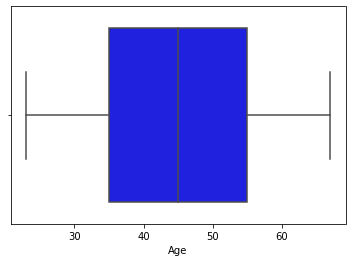

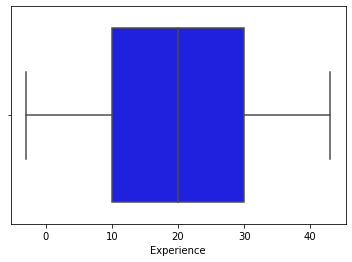

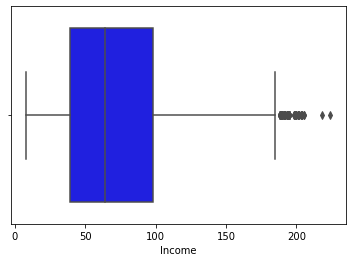

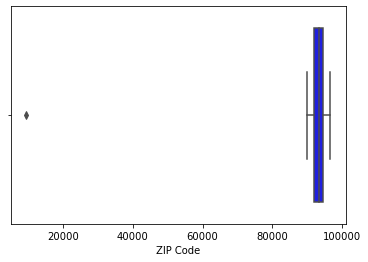

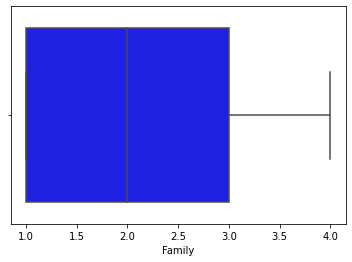

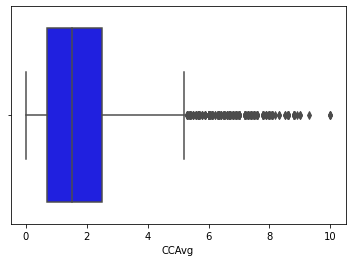

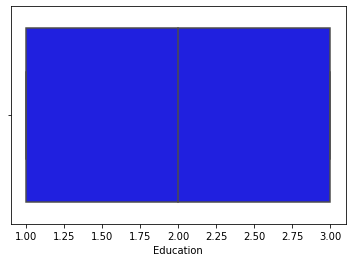

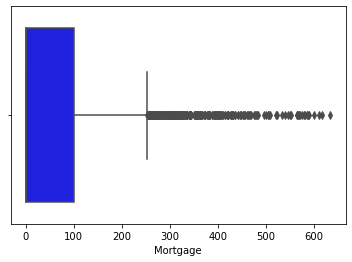

In [173]:
for i in df_num:
    sns.boxplot(df_num[i],color='b')
    plt.show()

In [174]:
## Lets use capping techinque to treat the outliers in the feature income.
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3-Q1
UL = Q3+1.5*IQR
print(UL)

df['Income'] = np.where(df['Income']>186.5, 186.5, df['Income'])

186.5


In [175]:
## Lets use IQR techinque to treat the outliers in the feature Zip Code.
## (only one outlier)
Q1 = df['ZIP Code'].quantile(0.25)
Q3 = df['ZIP Code'].quantile(0.75)
IQR = Q3-Q1
df = df[(df['ZIP Code']>Q1-1.5*IQR) & (df['ZIP Code']<Q3+1.5*IQR)]

In [176]:
## Has we can see the there are extreme values in the feature 'CCAvg', we will use sqrt transformation.
df['CCAvg'] = np.sqrt(df['CCAvg'])

In [177]:
## Has we can see the there are extreme values in the feature 'Mortgage', we will use sqrt transformation.
df['Mortgage'] = np.sqrt(df['Mortgage'])

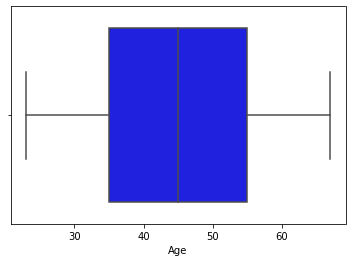

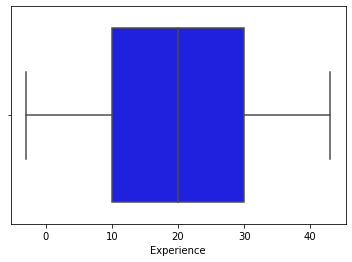

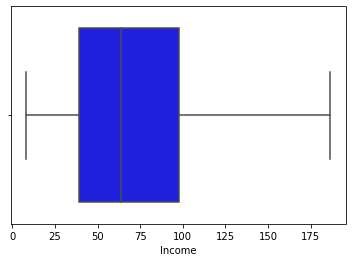

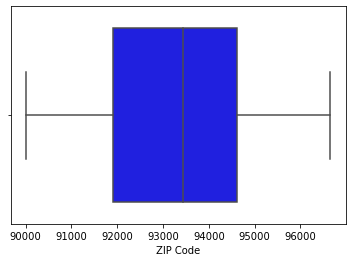

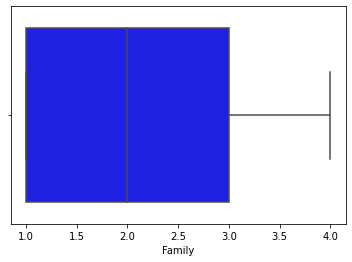

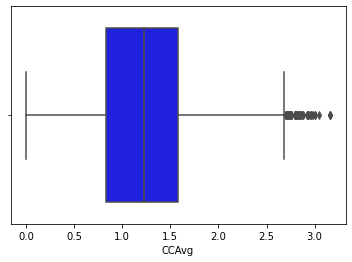

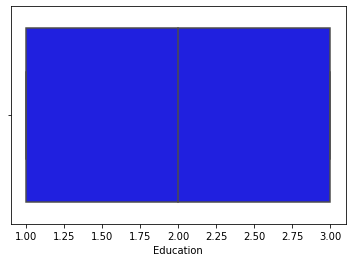

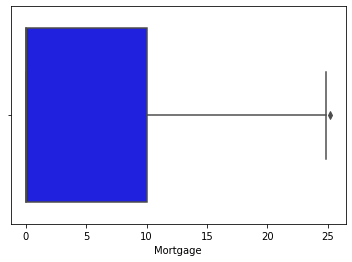

In [178]:
## Now lets see the outliers.
df_num = df.drop('Personal Loan',axis=1).select_dtypes(include=np.number)
for i in df_num:
    sns.boxplot(df_num[i],color='b')
    plt.show()

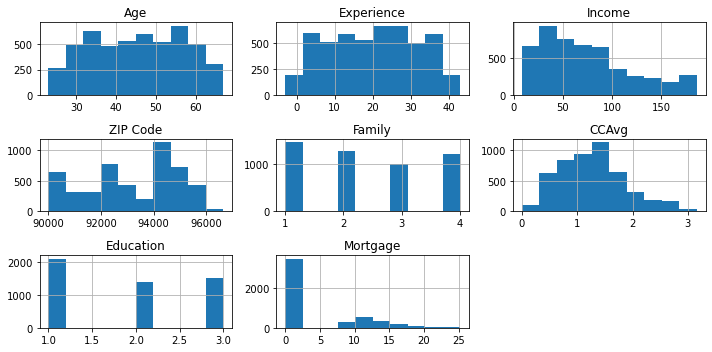

In [187]:
plt.rcParams['figure.figsize']= [10,5]
df.drop('Personal Loan',axis=1).hist()
plt.tight_layout()
plt.show()

In [ ]:
## Now we can see the data in all the numerical features is normally distributed.

## Lets convert the categorical features into dummy's

In [199]:
df = pd.get_dummies(data=df,drop_first=True)
df.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49.0,91107,4,1.264911,1,0.0,0,1,0,0,0
1,45,19,34.0,90089,3,1.224745,1,0.0,0,1,0,0,0


## Lets split and scale the data and build base model as  logistic regression model.

In [200]:
X = df.drop('Personal Loan',axis=1)
y = df['Personal Loan']
Xc = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(Xc,y,test_size=0.3, random_state=100)

In [201]:
X_train.head(2)

,const,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account_1,CD Account_1,Online_1,CreditCard_1
1238,1.0,28,2,63.0,91116,2,1.264911,3,0.0,0,0,1,0
1430,1.0,32,7,52.0,92660,2,0.316228,1,0.0,0,0,1,0


In [213]:
X_test.head(2)

,const,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account_1,CD Account_1,Online_1,CreditCard_1
4816,1.0,0.448214,0.379246,0.195497,-0.490024,0.545994,0.768165,0.170491,-0.634454,0,0,0,1
2825,1.0,-0.868170,-0.847899,-0.572908,1.065103,-1.192841,0.523108,1.359966,1.383663,0,0,1,0


## Lets scale the data.

In [206]:
ss = StandardScaler()

In [209]:
## Scaling only numerical features.
X_train.iloc[:,1:9] = ss.fit_transform(X_train.iloc[:,1:9])
X_test.iloc[:,1:9] = ss.fit_transform(X_test.iloc[:,1:9])

In [211]:
X_train.head(2)

,const,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account_1,CD Account_1,Online_1,CreditCard_1
1238,1.0,-1.525932,-1.591919,-0.228429,-1.159787,-0.354595,0.023050,1.321546,-0.637563,0,0,1,0
1430,1.0,-1.177702,-1.156685,-0.469397,-0.283453,-0.354595,-1.554008,-1.062005,-0.637563,0,0,1,0


In [212]:
X_test.head(2)

,const,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account_1,CD Account_1,Online_1,CreditCard_1
4816,1.0,0.448214,0.379246,0.195497,-0.490024,0.545994,0.768165,0.170491,-0.634454,0,0,0,1
2825,1.0,-0.868170,-0.847899,-0.572908,1.065103,-1.192841,0.523108,1.359966,1.383663,0,0,1,0


In [217]:
logreg_model = sm.Logit(y_train, X_train).fit()
print(logreg_model.summary())

Optimization terminated successfully.
         Current function value: 0.124756
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           12
Date:                Mon, 12 Jul 2021   Pseudo R-squ.:                  0.6087
Time:                        13:18:22   Log-Likelihood:                -436.52
converged:                       True   LL-Null:                       -1115.6
Covariance Type:            nonrobust   LLR p-value:                1.521e-283
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.3192      0.225    -19.155      0.000      -4.761      -3.877

## Inference:
- The LLR p-value is 1.521e-283 is lesser than 0.05, the model is significant.
- The p-values of Age(i.e, 0.941), Experience(i.e, 0.856), ZipCode(i.e, 0.674), Mortgage(i.e, 0.841) are greater than 0.05, these are insignificant features.

In [223]:
y_pred_prob = logreg_model.predict(X_test)
y_pred_prob.head()

4816    0.020282
2825    0.004840
1133    0.000388
4249    0.087759
2490    0.977315
dtype: float64

In [226]:
### Now lets keep the threshold as 0.5, if y_pred_pob is greater than 0.5 then 1  else 0.
y_pred = [0 if x<0.05 else 1 for x in y_pred_prob]
y_pred[:5]

[0, 0, 0, 1, 1]

In [228]:
## lets find the metrics.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1360
           1       0.35      0.92      0.51       140

    accuracy                           0.83      1500
   macro avg       0.67      0.87      0.71      1500
weighted avg       0.93      0.83      0.86      1500



In [229]:
accuracy_score(y_test,y_pred)   ## The base model is giving 0.83% accuracy.

0.8346666666666667

## Now lets find out the optimal threshold value to predict y by youndens index.

In [230]:
fpr, tpr, threshold = roc_curve(y_test,y_pred_prob)

In [234]:
youndens_table = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':threshold})

youndens_table['Difference'] = youndens_table.TPR - youndens_table.FPR

youndens_table = youndens_table.sort_values('Difference',ascending=False).reset_index(drop=True)

In [235]:
youndens_table.head()

,FPR,TPR,Threshold,Difference
0,0.096324,0.907143,0.114492,0.810819
1,0.094118,0.900000,0.116171,0.805882
2,0.109559,0.914286,0.097996,0.804727
3,0.096324,0.900000,0.114910,0.803676
4,0.093382,0.892857,0.116351,0.799475


#### As we can see that maximum cut-off probability is approximately 0.11, let us consider this as cut-off to predict the target values.

In [237]:
y_pred_youndens = [0 if x<0.11 else 1 for x in y_pred_prob]
y_pred_youndens[:5]

[0, 0, 0, 0, 1]

In [239]:
## lets check the classification report and accuracy.
print(classification_report(y_test, y_pred_youndens))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1360
           1       0.48      0.91      0.63       140

    accuracy                           0.90      1500
   macro avg       0.73      0.90      0.78      1500
weighted avg       0.94      0.90      0.91      1500



In [240]:
accuracy_score(y_test,y_pred_youndens)

0.8986666666666666

### The accuracy of the base model is 0.83(threshold as 0.05) and after finding the optimal threshold value using younden's index the accuracy increased i.e, 0.89.

## Now lets build Desicion tree classification model.

In [255]:
ss = StandardScaler()
X = df.drop('Personal Loan',axis=1)
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100)

X_train.iloc[:,:8] = ss.fit_transform(X_train.iloc[:,:8])
X_test.iloc[:,:8] = ss.fit_transform(X_test.iloc[:,:8])

In [256]:
X_train.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account_1,CD Account_1,Online_1,CreditCard_1
1238,-1.525932,-1.591919,-0.228429,-1.159787,-0.354595,0.023050,1.321546,-0.637563,0,0,1,0
1430,-1.177702,-1.156685,-0.469397,-0.283453,-0.354595,-1.554008,-1.062005,-0.637563,0,0,1,0


In [257]:
X_test.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account_1,CD Account_1,Online_1,CreditCard_1
4816,0.448214,0.379246,0.195497,-0.490024,0.545994,0.768165,0.170491,-0.634454,0,0,0,1
2825,-0.868170,-0.847899,-0.572908,1.065103,-1.192841,0.523108,1.359966,1.383663,0,0,1,0


In [261]:
dtree_base = DecisionTreeClassifier(criterion='entropy',random_state=100)
dtree_base.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [265]:
y_pred = dtree_base.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [285]:
y_pred_train = dtree_base.predict(X_train)
y_pred_train[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [267]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1360
           1       0.87      0.87      0.87       140

    accuracy                           0.98      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.98      0.98      0.98      1500



In [286]:
print('train-accuracy',accuracy_score(y_train,y_pred_train))
print('test-accuracy',accuracy_score(y_test,y_pred))

train-accuracy 1.0
test-accuracy 0.9753333333333334


## The desicion tree model is Over fitting.

## Lets tune the hyperparameters using Gridsearchcv

In [271]:
tuned_parameters = [{'criterion':['entropy','gini'],
                    'max_depth':range(2, 10),
                    'max_features':['sqrt','log2'],
                    'min_samples_split':range(2,10),
                    'min_samples_leaf':range(1,10),
                    'max_leaf_nodes':range(1,10)}]

dtree = DecisionTreeClassifier(random_state=100)


tree_gsearch = GridSearchCV(estimator=dtree,
                        param_grid= tuned_parameters,
                        cv = 5)

tree_gsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(2, 10),
                          'max_features': ['sqrt', 'log2'],
                          'max_leaf_nodes': range(1, 10),
                          'min_samples_leaf': range(1, 10),
                          'min_samples_split': range(2, 10)}])

In [272]:
tree_gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

## Now we got the best hyperparameters by tuning, lets build a model using them.

In [273]:
dtree_tuned = DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='sqrt',max_leaf_nodes=9,
                              min_samples_leaf=5, min_samples_split=2)

dtree_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', max_leaf_nodes=9,
                       min_samples_leaf=5)

In [281]:
y_pred_train_tuned = dtree_tuned.predict(X_train)
y_pred_train_tuned[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [282]:
y_pred_test_tuned = dtree_tuned.predict(X_test)
y_pred_test_tuned[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [275]:
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1360
           1       0.92      0.50      0.65       140

    accuracy                           0.95      1500
   macro avg       0.94      0.75      0.81      1500
weighted avg       0.95      0.95      0.94      1500



In [284]:
print('train-accuracy',accuracy_score(y_train,y_pred_train_tuned))
print('test-accuracy',accuracy_score(y_test,y_pred_test_tuned))

train-accuracy 0.9545584452700772
test-accuracy 0.9493333333333334


##### Before hyperparameter tuning the desicion tree classification model was overfitting, after hyperparameter tuning the model is a good fit.

## Now lets build a Random Forest Classification model.

In [288]:
Rforest_base = RandomForestClassifier(n_estimators=10, random_state=100)

Rforest_base.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=100)

In [289]:
y_train_pred = Rforest_base.predict(X_train)
y_test_pred = Rforest_base.predict(X_test)

print('accuracy train: ',accuracy_score(y_train,y_train_pred))
print('accuracy test: ',accuracy_score(y_test,y_test_pred))

accuracy train:  0.9985710202915119
accuracy test:  0.9813333333333333


### Lets tune the hyperparameters for the Random forest algorithim.

In [291]:
tuned_parameters = [{'criterion':['entropy','gini'],
                    'n_estimators':[10,30,50,70,90],
                    'max_depth':range(1,10),
                    'max_features':['sqrt','log'],
                    'min_samples_split':[2,5,8,11],
                    'min_samples_leaf':[1,5,9],
                    'max_leaf_nodes':[2,5,8,11]}]

Rforest = RandomForestClassifier(random_state=100)

Rforest_gsearch = GridSearchCV(estimator=Rforest, param_grid=tuned_parameters, cv=3)

Rforest_gsearch.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(1, 10),
                          'max_features': ['sqrt', 'log'],
                          'max_leaf_nodes': [2, 5, 8, 11],
                          'min_samples_leaf': [1, 5, 9],
                          'min_samples_split': [2, 5, 8, 11],
                          'n_estimators': [10, 30, 50, 70, 90]}])

In [292]:
Rforest_gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 30}

### Lets build a Randaom forest classification model using tuned hyperparameters.

In [293]:
Rforest_tuned = RandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=7,max_features='sqrt',
                                      max_leaf_nodes=11,min_samples_leaf=5,min_samples_split=11,random_state=100)

Rforest_tuned.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=11, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=30, random_state=100)

In [294]:
y_train_pred = Rforest_tuned.predict(X_train)
y_test_pred = Rforest_tuned.predict(X_test)

print('accuracy train: ',accuracy_score(y_train,y_train_pred))
print('accuracy test: ',accuracy_score(y_test,y_test_pred))

accuracy train:  0.9734209774221206
accuracy test:  0.972


In [299]:
y_pred_proba = Rforest_tuned.predict_proba(X_test)[:,1] 
y_pred_proba

array([0.03693556, 0.01545886, 0.01371821, ..., 0.00922958, 0.01492771,
       0.01415145])

(0.0, 1.0)

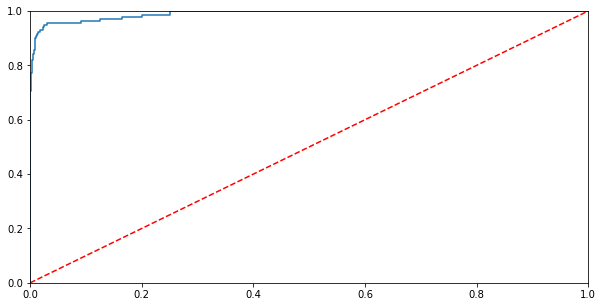

In [306]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

## Lets find the important features.

In [295]:
important_features = pd.DataFrame({'features':X_train.columns,
                                  'Importance':Rforest_tuned.feature_importances_})

important_features = important_features.sort_values('Importance',ascending=False).reset_index(drop=True)
important_features

,features,Importance
0,Income,0.535128
1,CCAvg,0.179515
2,Education,0.143253
3,Family,0.055581
4,CD Account_1,0.048853
5,Mortgage,0.011584
6,Age,0.009133
7,Experience,0.007042
8,ZIP Code,0.005758
9,CreditCard_1,0.001707


<AxesSubplot:xlabel='Importance', ylabel='features'>

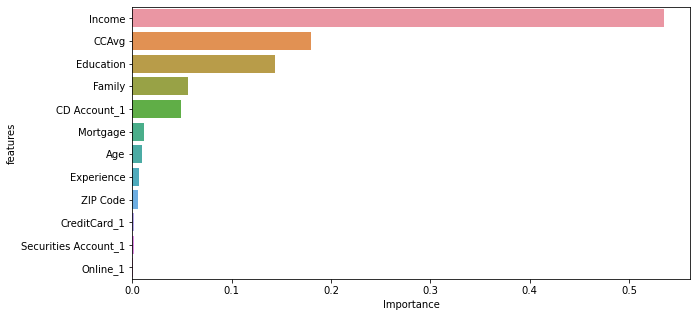

In [296]:
sns.barplot(x='Importance',y='features',data=important_features)

In [ ]:
## We can also built classification models by only considering the top 5 important features.

## Now lets build a KNN (K-nearest neigbours), classification model.

In [311]:
from sklearn.neighbors import KNeighborsClassifier

In [315]:
knn_base = KNeighborsClassifier()
knn_base.fit(X_train,y_train)

KNeighborsClassifier()

In [316]:
y_train_pred = knn_base.predict(X_train)
y_test_pred = knn_base.predict(X_test)

print('train accuracy: ',accuracy_score(y_train,y_train_pred))
print('test accuracy: ',accuracy_score(y_test,y_test_pred))

train accuracy:  0.9714204058302373
test accuracy:  0.9626666666666667


### Lets tune the hyperparameters.

In [325]:
tuned_params = [{'n_neighbors':range(1,25,2),
                    'metric':['hamming','euclidean','manhattan','Chebyshev']}]

knn = KNeighborsClassifier()

knn_gsearch = GridSearchCV(estimator=knn, param_grid=tuned_params, cv=5, scoring='accuracy')

knn_gsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['hamming', 'euclidean', 'manhattan',
                                     'Chebyshev'],
                          'n_neighbors': range(1, 25, 2)}],
             scoring='accuracy')

In [326]:
knn_gsearch.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

In [344]:
from sklearn.model_selection import cross_val_score
## lets check optimal k value graphically.
accuracy = []
for i in range(1,25,2):
    knn = KNeighborsClassifier(i,metric='euclidean')
    cv = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv = cv.mean()
    accuracy.append(cv)

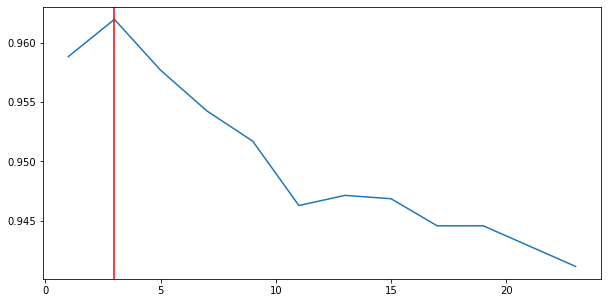

In [346]:
plt.plot(range(1,25,2),accuracy)
plt.axvline(3,color='r')

In [347]:
y_train_pred = knn_gsearch.predict(X_train)
y_test_pred = knn_gsearch.predict(X_test)

print('train accuracy: ',accuracy_score(y_train,y_train_pred))
print('test accuracy: ',accuracy_score(y_test,y_test_pred))

train accuracy:  0.9757073449557017
test accuracy:  0.9593333333333334


## From the above results from the different classification models built, the best results giving model is RandomForest classification model with hyperparameter tuning, 97% of accuracy.